<a href="https://colab.research.google.com/github/Hyeri-Jerrie-Kim/Unsupervised-Learning/blob/main/COMP257_Assignment1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment 1: Dimensionality Reduction using PCA


### Author : Hyeri Kim
### Stu ID : 301208760
### Course : COMP257
### Section : 002
### Professor : Vaishali Chandrashekar Siddeshwar

### Question 1

#### 1. Retrieve and load the mnist_784 dataset of 70,000 instances.

In [ ]:
from sklearn.datasets import fetch_openml
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA, IncrementalPCA
import warnings
warnings.filterwarnings(action='ignore', category=FutureWarning)

In [ ]:
#load the MNIST dataset.
mnist = fetch_openml('mnist_784', version=1, as_frame=False)
dir(mnist)

['DESCR',
 'categories',
 'data',
 'details',
 'feature_names',
 'frame',
 'target',
 'target_names',
 'url']

#### 2. Display each digit.

In [ ]:
X = mnist['data']
y = mnist['target']

In [ ]:
X = pd.DataFrame(X).to_numpy()
y = pd.DataFrame(y).to_numpy()

In [ ]:
unique_val, index = np.unique(y, return_index = True)

In [ ]:
print(unique_val)

['0' '1' '2' '3' '4' '5' '6' '7' '8' '9']


In [ ]:
print(index)

[ 1  3  5  7  2  0 13 15 17  4]


In [ ]:
def plot_digits(data, target, index):
    some_digit = data[index]
    plt.imshow(some_digit.reshape(28,28), cmap="binary")
    plt.axis("on")

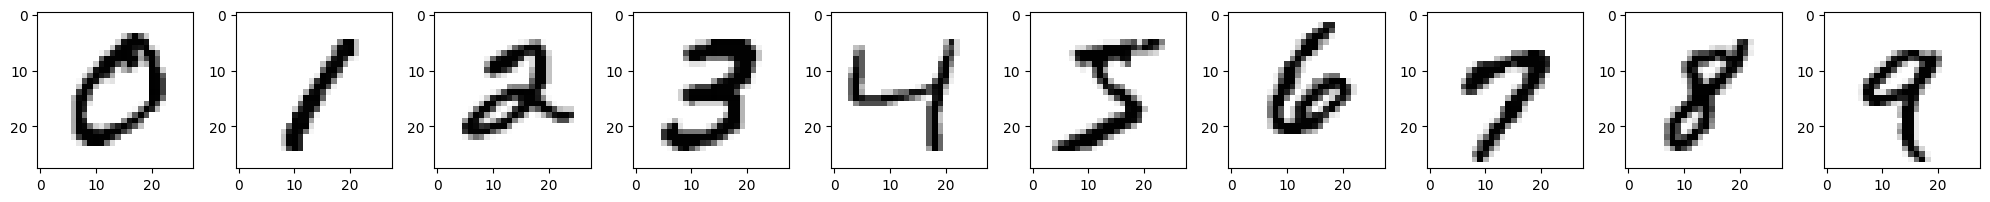

In [ ]:
# Adjust the figure size
plt.figure(figsize=(20,4))

# Display each digit with a single row and 10 columns
for i in range(10):
    plt.subplot(1, 10, i + 1)     # 1 row, 10 columns, i + 1 is the current subplot position
    plot_digits(X, y, index[i])
plt.tight_layout()                # To ensure proper spacing between subplots
plt.show()

#### 3. Use PCA to retrieve the **1th** and **2nd** principal component and output their explained variance ratio.

In [ ]:
pca = PCA(n_components = 2)
pca.fit(X)

PCA(n_components=2)

In [ ]:
explained_variance_ratio = pca.explained_variance_ratio_

print("Explained Variance Ratios: ", explained_variance_ratio)

Explained Variance Ratios:  [0.09746116 0.07155445]


#### 4. Plot the projections of the **1th** and **2nd** principal component onto a 1D hyperplane.

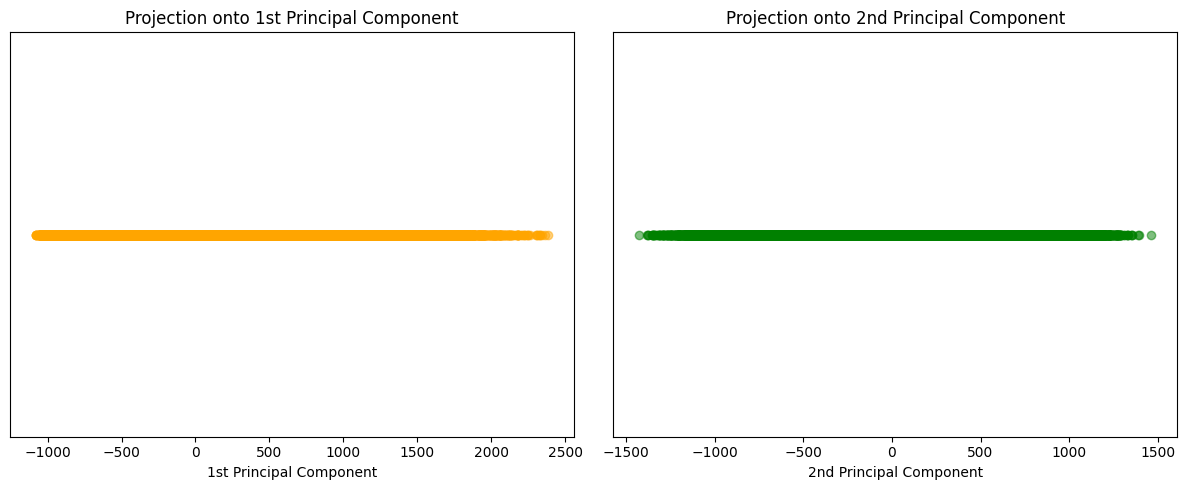

In [ ]:
X_pca = pca.fit_transform(X)

first_prcp_component = pca.components_[0]
second_prcp_component = pca.components_[1]

# Project the data onto the 1D hyperplane defined by the 1st component
projection_1st = X_pca[:, 0]

# Project the data onto the 1D hyperplane defined by the 2nd component
projection_2nd = X_pca[:, 1]

# Create scatter plots for the projections
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.scatter(projection_1st, np.zeros_like(projection_1st), alpha=0.5, c='orange')
plt.title("Projection onto 1st Principal Component")
plt.xlabel("1st Principal Component")
plt.yticks([])

plt.subplot(1, 2, 2)
plt.scatter(projection_2nd, np.zeros_like(projection_2nd), alpha=0.5, c='green')
plt.title("Projection onto 2nd Principal Component")
plt.xlabel("2nd Principal Component")
plt.yticks([])

plt.tight_layout()
plt.show()

#### 5. Use Incremental PCA to reduce the dimensionality of the MNIST dataset down to 154 dimensions.

In [ ]:
n_components=154
ipca = IncrementalPCA(n_components=n_components)
ipca.fit(X)

IncrementalPCA(n_components=154)

#### 6. Display the original and compressed digits from (5).

In [ ]:
def plot_original_and_compressed(sample_digit, sample_reduced, n_components):
    # Display original digit
    plt.imshow(sample_digit.reshape(28, 28), cmap='gray')
    plt.title('Original Digit')
    plt.axis('off')

    # Display compressed digit
    plt.imshow(ipca.inverse_transform(sample_reduced).reshape(28, 28), cmap='gray')
    plt.title(f'Compressed Digit ({n_components} components)')
    plt.axis('off')

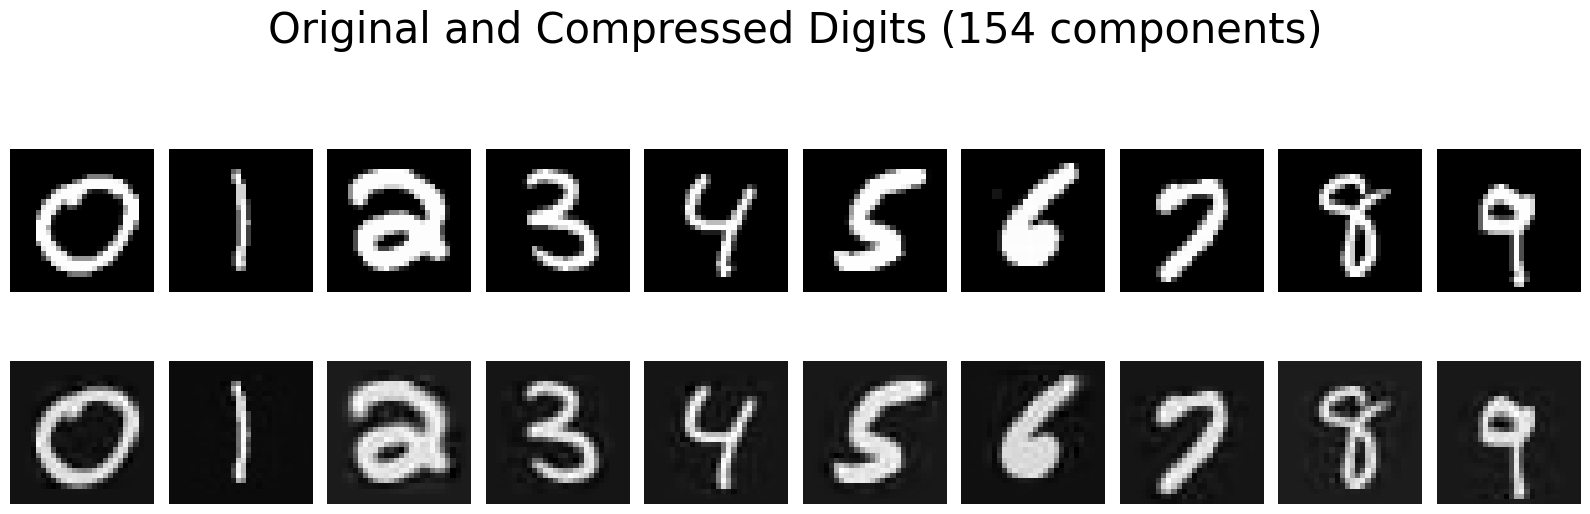

In [ ]:
# Create a single row with 10 columns for displaying original and compressed digits
plt.figure(figsize=(16, 6))
for digit_class, idx in enumerate(index):
    # Select a random sample from the current class
    sample_index = np.random.choice(np.where(y == unique_val[digit_class])[0])
    sample_digit = X[sample_index]

    # Fit IPCA to the current class
    class_X = X[np.where(y == unique_val[digit_class])[0]]
    ipca.fit(class_X)

    # Transform the sample digit
    sample_reduced = ipca.transform(sample_digit.reshape(1, -1))

    # Plot the original digit
    plt.subplot(2, 10, digit_class + 1)
    plt.imshow(sample_digit.reshape(28, 28), cmap='gray')
    #plt.title('Original Digit')
    plt.axis('off')

    # Plot the compressed digit
    plt.subplot(2, 10, digit_class + 11)
    plt.imshow(ipca.inverse_transform(sample_reduced).reshape(28, 28), cmap='gray')
    #plt.title('Compressed Digit')
    plt.axis('off')

plt.suptitle(f'Original and Compressed Digits ({n_components} components)', fontsize=30)

plt.tight_layout()
plt.show()

### Question 2

#### 1. Generate Swiss roll dataset.

In [ ]:
import numpy as np
from sklearn.datasets import make_swiss_roll
import matplotlib.pyplot as plt
from sklearn.decomposition import KernelPCA
from sklearn.preprocessing import StandardScaler

In [ ]:
n_samples = 1000
noise = 0.2  # Adjust noise level as needed
X, y = make_swiss_roll(n_samples, noise=noise, random_state = 60)

# Center and scale the data using StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_normalized = X_scaled / np.std(X_scaled, axis=0)  # Normalize to unit variance

#### 2. Plot the resulting generated Swiss roll dataset.

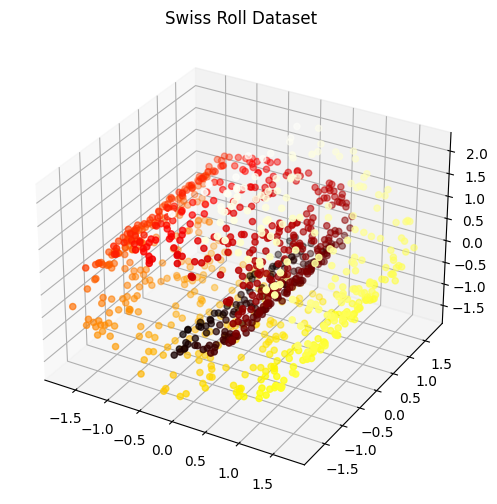

In [ ]:
fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_normalized[:, 0], X_normalized[:, 1], X_normalized[:, 2], c= y, cmap='hot')
ax.set_title("Swiss Roll Dataset")
plt.show()

#### 3. Use Kernel PCA (kPCA) with linear kernel, a RBF kernel, and a sigmoid kernel

In [ ]:
# 3. Use Kernel PCA(kPCA) with linear, rbf, and sigmoid kernels.
from sklearn.decomposition import KernelPCA

pca_lin = KernelPCA(n_components=2, kernel='linear', random_state=60)
pca_rbf = KernelPCA(n_components=2, kernel='rbf', random_state=60, gamma=0.1)
pca_sig = KernelPCA(n_components=2, kernel='sigmoid', random_state=60, gamma=0.0005)
pca_lin.fit(X_normalized)
pca_rbf.fit(X_normalized)
pca_sig.fit(X_normalized)

KernelPCA(gamma=0.0005, kernel='sigmoid', n_components=2, random_state=60)

#### 4. Plot the kPCA results of applying the linear kernel, a RBF kernel, and a sigmoid kernel from (3). Explain and compare the results

In [ ]:
# Define a function to plot kPCA results
def plot_kpca_results(X, pca, title):
    X_kpca = pca.transform(X)

    plt.figure(figsize=(4, 4))
    plt.scatter(X_kpca[:, 0], X_kpca[:, 1], c=X[:, 2], cmap=plt.cm.Spectral)
    plt.title(title)

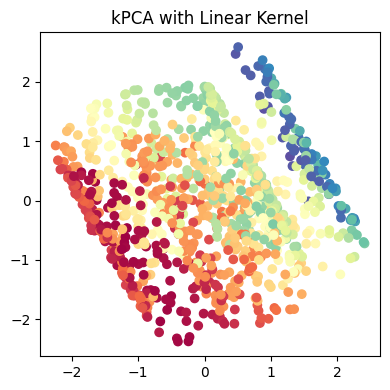

In [ ]:
# Plot kPCA results for each kernel
plot_kpca_results(X_normalized, pca_lin, "kPCA with Linear Kernel")

plt.tight_layout()
plt.show()

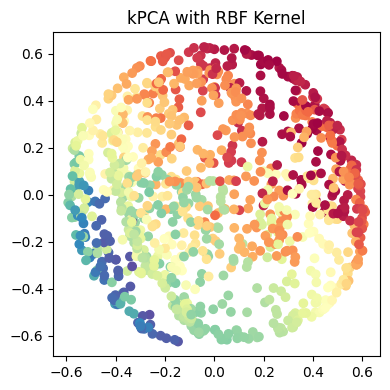

In [ ]:
plot_kpca_results(X_normalized, pca_rbf, "kPCA with RBF Kernel")

plt.tight_layout()
plt.show()

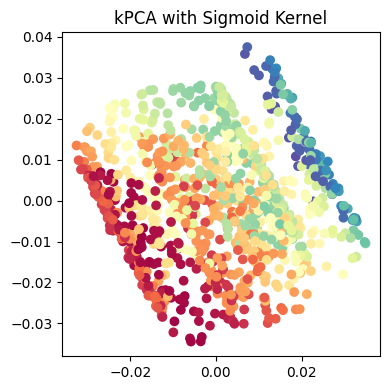

In [ ]:
plot_kpca_results(X_normalized, pca_sig, "kPCA with Sigmoid Kernel")

plt.tight_layout()
plt.show()

#### 5. Using kPCA and a kernel of your choice, apply Logistic Regression for classification. Use GridSearchCV to find the best kernel and gamma value for kPCA in order to get the best classification accuracy at the end of the pipeline. Print out best parameters found by GridSearchCV.

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

In [ ]:
# convert into a binary classification problem so that make it suitable for Logistic Regression,
# which are designed for binary classification tasks.
threshold = np.median(y)
print("Threshold: ", threshold)
y_binary = np.where(threshold <= y, 1, 0)

# Preprocess the data by standardizing it
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Define a pipeline with Kernel PCA and Logistic Regression
pipeline = Pipeline([
    ("kpca", KernelPCA(kernel='rbf', random_state=60, gamma=0.001, n_components=2)),  # Adjusted kernel and gamma
    ("log_reg", LogisticRegression())
])

# Define a grid of gamma values, c values and kernel to search
param_grid = {
    "kpca__gamma": np.logspace(-6, 1, 20),  # Adjusted gamma range
    "log_reg__C": np.logspace(-3, 1, 6),    # A wider range of C values
}

Threshold:  9.298570888700038


In [ ]:
# Apply GridSearchCV with 3-fold cross-validation to find the best parameters
grid_search = GridSearchCV(pipeline, param_grid, cv=3, scoring='accuracy', error_score='raise')
grid_search.fit(X_scaled, y_binary)

GridSearchCV(cv=3, error_score='raise',
             estimator=Pipeline(steps=[('kpca',
                                        KernelPCA(gamma=0.001, kernel='rbf',
                                                  n_components=2,
                                                  random_state=60)),
                                       ('log_reg', LogisticRegression())]),
             param_grid={'kpca__gamma': array([1.00000000e-06, 2.33572147e-06, 5.45559478e-06, 1.27427499e-05,
       2.97635144e-05, 6.95192796e-05, 1.62377674e-04, 3.79269019e-04,
       8.85866790e-04, 2.06913808e-03, 4.83293024e-03, 1.12883789e-02,
       2.63665090e-02, 6.15848211e-02, 1.43844989e-01, 3.35981829e-01,
       7.84759970e-01, 1.83298071e+00, 4.28133240e+00, 1.00000000e+01]),
                         'log_reg__C': array([1.00000000e-03, 6.30957344e-03, 3.98107171e-02, 2.51188643e-01,
       1.58489319e+00, 1.00000000e+01])},
             scoring='accuracy')

In [ ]:
# Access the GridSearchCV results
results = grid_search.cv_results_

Cs = results['param_log_reg__C'].data
gammas = results['param_kpca__gamma'].data
scores = results['mean_test_score']

#### 6. Plot the results from using GridSearchCV in (5).

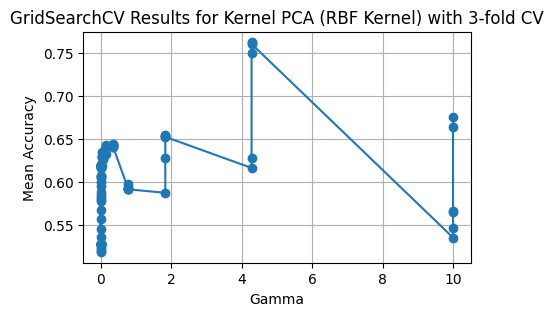

In [ ]:
# Create a plot to visualize the accuracy scores with different gamma values
plt.figure(figsize=(5, 3))
plt.plot(gammas, scores, marker='o', linestyle='-')
plt.xlabel('Gamma')
plt.ylabel('Mean Accuracy')
plt.title('GridSearchCV Results for Kernel PCA (RBF Kernel) with 3-fold CV')
plt.grid()
plt.show()

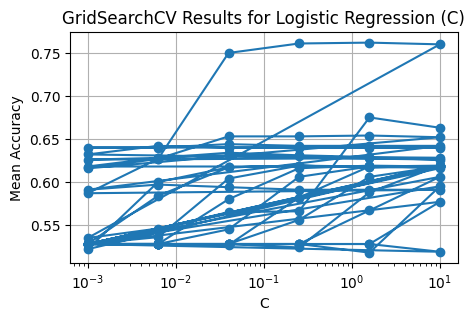

In [ ]:
plt.figure(figsize=(5, 3))
plt.semilogx(Cs, scores, marker='o', linestyle='-')
plt.xlabel('C')
plt.ylabel('Mean Accuracy')
plt.title('GridSearchCV Results for Logistic Regression (C)')
plt.grid()
plt.show()

In [ ]:
# Print the best parameters and score
best_params = grid_search.best_params_
best_score = grid_search.best_score_
print("Best Parameters:", best_params)
print("Best Score (Accuracy):", best_score)

Best Parameters: {'kpca__gamma': 4.281332398719387, 'log_reg__C': 1.584893192461114}
Best Score (Accuracy): 0.7620135105165046


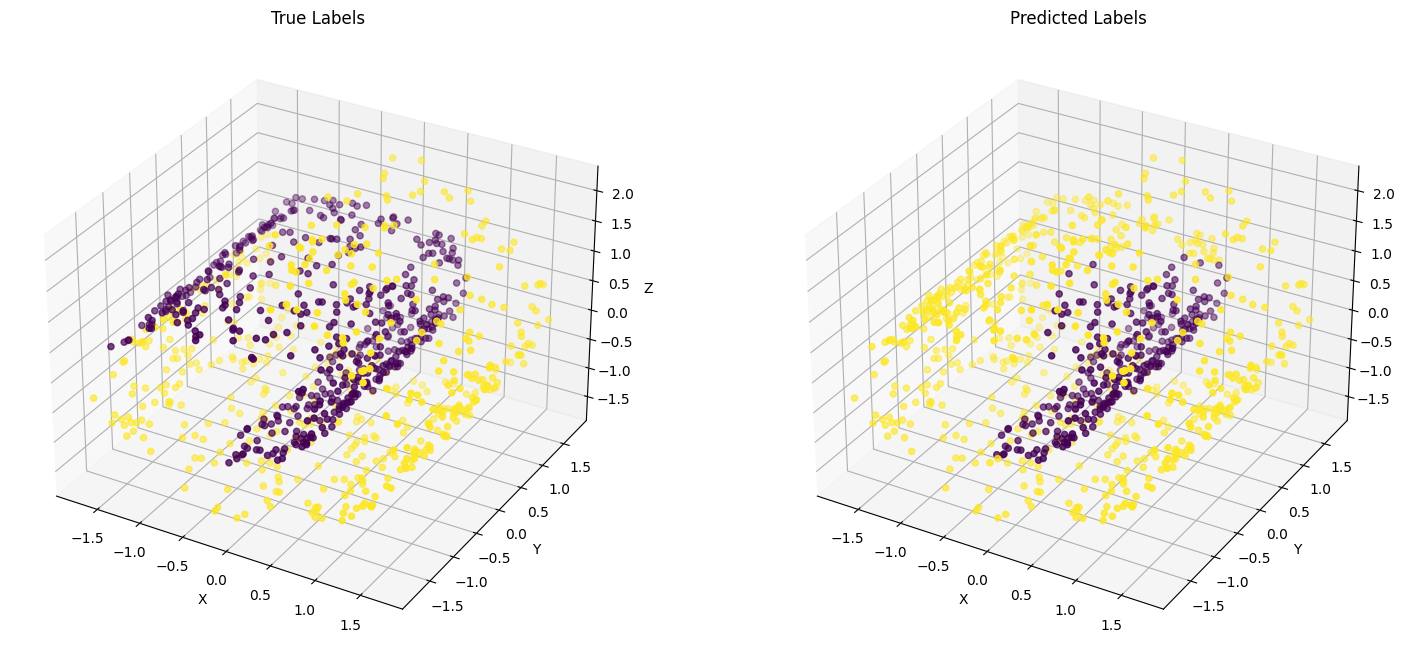

In [ ]:
y_pred = grid_search.predict(X_scaled)

# Create 3D plots for the true and predicted labels
fig = plt.figure(figsize=(18, 8))

# Plot for true labels
ax1 = fig.add_subplot(121, projection='3d')
ax1.scatter(X_scaled[:, 0], X_scaled[:, 1], X_scaled[:, 2], c=y_binary, cmap='viridis')
ax1.set_title('True Labels')
ax1.set_xlabel('X')
ax1.set_ylabel('Y')
ax1.set_zlabel('Z')

# Plot for predicted labels
ax2 = fig.add_subplot(122, projection='3d')
ax2.scatter(X_scaled[:, 0], X_scaled[:, 1], X_scaled[:, 2], c=y_pred, cmap='viridis')
ax2.set_title('Predicted Labels')
ax2.set_xlabel('X')
ax2.set_ylabel('Y')
ax2.set_zlabel('Z')

plt.show()

### Extra work

In [ ]:
# Define a pipeline with Kernel PCA and Logistic Regression using a sigmoid kernel
pipeline = Pipeline([
    ("kpca", KernelPCA(kernel='sigmoid', n_components=2, gamma=0.001)),  # Sigmoid kernel
    ("log_reg", LogisticRegression())
])

# Define a grid of gamma values to search
param_grid = {
    "kpca__gamma": np.logspace(-6, 1, 20),  # Adjusted gamma range
    "log_reg__C": np.logspace(-3, 3, 20),    # A wider range of C values
}

In [ ]:
# Apply GridSearchCV with 3-fold cross-validation to find the best parameters
grid_search = GridSearchCV(pipeline, param_grid, cv=3, scoring='accuracy', error_score='raise')
grid_search.fit(X_scaled, y_binary)

GridSearchCV(cv=3, error_score='raise',
             estimator=Pipeline(steps=[('kpca',
                                        KernelPCA(gamma=0.001, kernel='sigmoid',
                                                  n_components=2)),
                                       ('log_reg', LogisticRegression())]),
             param_grid={'kpca__gamma': array([1.00000000e-06, 2.33572147e-06, 5.45559478e-06, 1.27427499e-05,
       2.97635144e-05, 6.95192796e-05, 1.62377674e-04, 3.79269019e-04,
       8.85866790e-04, 2.06913808e-03, 4.83...
       7.84759970e-01, 1.83298071e+00, 4.28133240e+00, 1.00000000e+01]),
                         'log_reg__C': array([1.00000000e-03, 2.06913808e-03, 4.28133240e-03, 8.85866790e-03,
       1.83298071e-02, 3.79269019e-02, 7.84759970e-02, 1.62377674e-01,
       3.35981829e-01, 6.95192796e-01, 1.43844989e+00, 2.97635144e+00,
       6.15848211e+00, 1.27427499e+01, 2.63665090e+01, 5.45559478e+01,
       1.12883789e+02, 2.33572147e+02, 4.83293024e+02, 1.00000000e+03])},
             scoring='accuracy')

In [ ]:
# Access the GridSearchCV results
results = grid_search.cv_results_
Cs = results['param_log_reg__C'].data
gammas = results['param_kpca__gamma'].data
scores = results['mean_test_score']

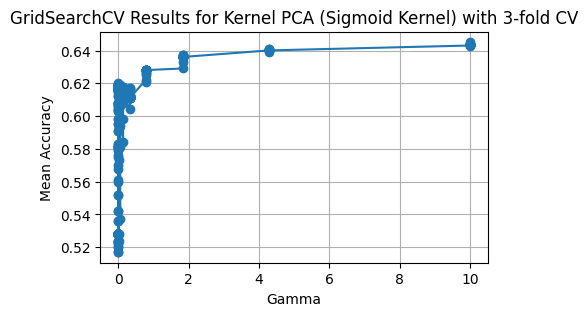

In [ ]:
# Create a plot to visualize the accuracy scores with different gamma values
plt.figure(figsize=(5, 3))
plt.plot(gammas, scores, marker='o', linestyle='-')
plt.xlabel('Gamma')
plt.ylabel('Mean Accuracy')
plt.title('GridSearchCV Results for Kernel PCA (Sigmoid Kernel) with 3-fold CV')
plt.grid()
plt.show()

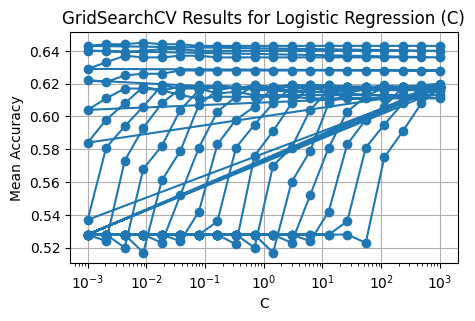

In [ ]:
plt.figure(figsize=(5, 3))
plt.semilogx(Cs, scores, marker='o', linestyle='-')
plt.xlabel('C')
plt.ylabel('Mean Accuracy')
plt.title('GridSearchCV Results for Logistic Regression (C)')
plt.grid()
plt.show()

In [ ]:
# Print the best parameters and score
best_params = grid_search.best_params_
best_score = grid_search.best_score_
print("Best Parameters:", best_params)
print("Best Score (Accuracy):", best_score)

Best Parameters: {'kpca__gamma': 10.0, 'log_reg__C': 0.008858667904100823}
Best Score (Accuracy): 0.6450522378666091
